# Models bencharmk

In this notebook we are benchmarking 3 models to determine which model is best for stock price prediction
After doing some research we decided to go with these 3 models:
 - ARIMA Model (with MA)
 - LSTM Model
 - GRU Model

The dataset used for our testing is AB.csv from 04-01-2010 -> 30-04-2025

In [ ]:
%load_ext autoreload
%autoreload 2
# Imports
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# we need to add the project directory to import modules
import sys,os
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()) / '..' / '..'))

from utils import split_dataset, train, get_features_target_from_dataset ,evaluate, plot_evaluation_result, plot_stock_graph
from src import ARIMAModel, GRUModel, LSTMModel
from enums import ValidationMetricEnum

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# Load Dataset
csv_path = "AB.csv"

data = pd.read_csv(
    csv_path,
    parse_dates=["date"],
    sep=";",
    dayfirst=False,
)

data.head()

,date,ouverture,haut,bas,cloture,volume
0,2010-01-04,20.097738,20.211499,20.097738,20.211499,970.0
1,2010-01-05,20.211499,20.742383,20.097738,20.628622,19292.0
2,2010-01-06,20.666542,21.231554,20.628622,20.856143,14965.0
3,2010-01-07,20.856143,21.349107,20.704462,21.239138,16099.0
4,2010-01-08,21.534916,21.534916,20.969904,21.235346,1460.0


In [23]:
df_with_sma = data.copy()
df_with_sma['SMA_5'] = df_with_sma['cloture'].rolling(window=5).mean()
df_with_sma['SMA_20'] = df_with_sma['cloture'].rolling(window=20).mean()
df_with_sma['SMA_50'] = df_with_sma['cloture'].rolling(window=50).mean()

df_with_sma = df_with_sma.dropna()
df_with_sma.head()

,date,ouverture,haut,bas,cloture,volume,SMA_5,SMA_20,SMA_50
49,2010-02-22,22.717080,22.751209,22.580567,22.751209,3316.25,22.749502,22.537812,21.889888
50,2010-02-23,22.706652,22.752157,22.706652,22.752157,4036.00,22.750260,22.559048,21.940701
51,2010-02-24,22.183353,22.748364,22.183353,22.748364,133.00,22.750260,22.577818,21.983096
52,2010-02-25,22.748364,22.748364,22.297113,22.372954,511.00,22.674989,22.577818,22.013432
53,2010-02-26,22.654512,22.747416,22.149224,22.464911,910.50,22.617919,22.571229,22.037947


In [24]:
df_with_close_only = data['cloture'].values.reshape(-1,1)

print(df_with_close_only)

[[20.21149904]
 [20.6286219 ]
 [20.85614347]
 ...
 [41.6       ]
 [41.6       ]
 [41.69      ]]


In [ ]:
train_dataset, test_dataset = split_dataset(dataset=data)
print(train_dataset.shape)
print(test_dataset.shape)

train_SMA, test_SMA = split_dataset(dataset=df_with_sma)
print(train_SMA.shape)
print(test_SMA.shape)

train_cloture, test_cloture = split_dataset(dataset=df_with_close_only)
print(train_cloture.shape)
print(test_cloture.shape)

(4477, 6)
(1119, 6)
(4438, 9)
(1109, 9)
(4477, 1)
(1119, 1)


In [ ]:
# prepare models and datasets
models_and_datasets = {"ARIMA": (ARIMAModel(), train_cloture, test_cloture), 
                       "GRU": (GRUModel(), train_dataset, test_dataset),
                       "GRU With SMA": (GRUModel(), train_SMA, test_SMA),
                       "GRU With cloture only": (GRUModel(), train_cloture, test_cloture),
                       "LSTM": (LSTMModel(), train_dataset, test_dataset),
                       "LSTM with SMA": (LSTMModel(), train_SMA, test_SMA),
                       "LSTM With cloture only": (LSTMModel(), train_cloture, test_cloture)}

In [41]:
scalar_dict = train(models_and_datasets)

training ARIMA model ...
features shape: (4477,)
training GRU model ...
features shape: (4417, 60, 5)
targets shape: (4417,)
Epoch 1/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 26s 189ms/step - loss: 0.0511
Epoch 2/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - loss: 0.0037
Epoch 3/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - loss: 0.0023
Epoch 4/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - loss: 0.0017
Epoch 5/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - loss: 0.0014
Epoch 6/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - loss: 0.0012
Epoch 7/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - loss: 0.0012
Epoch 8/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - loss: 0.0012
Epoch 9/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - loss: 0.0011
Epoch 10/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - loss: 0.0011
Epoch 11/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - loss: 0.0010
Epoch 12/40
139/139 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - loss: 9.1468e-04
Epoch 13/40
139/139 ━━━━━━━━

In [50]:
# one last effort to optimize arima
arima_dataset = data['cloture'].diff().dropna().values.reshape(-1,1)
print(arima_dataset)
print(arima_dataset.shape)

train_arima, test_arima = split_dataset(dataset=arima_dataset)
print(train_arima.shape)
print(test_arima.shape)

[[0.41712287]
 [0.22752157]
 [0.38299463]
 ...
 [0.03333333]
 [0.        ]
 [0.09      ]]
(5595, 1)
(4476, 1)
(1119, 1)


In [52]:
optimized_arima_dict = {"ARIMA Optimized": (ARIMAModel(), train_arima, test_arima)}


In [53]:
arima_optimized_scaler = train(optimized_arima_dict)

training ARIMA Optimized model ...
features shape: (4476,)


In [57]:
# replace the old arima with the optimized
models_and_datasets["ARIMA"] = optimized_arima_dict["ARIMA Optimized"]
scalar_dict["ARIMA"] = arima_optimized_scaler["ARIMA Optimized"]

evaluating ARIMA model ...
number of days to predict: 1119
prediction result shape: (1119,)
test y dim before flattening:(1119,)
predict y dim before flattening:(1119,)
test y dim after flattening:(1119,)
predict y dim after flattening:(1119,)
evaluating GRU model ...
input shape: (1059, 60, 5)
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
prediction result shape: (1059, 1)
test y dim before flattening:(1059,)
predict y dim before flattening:(1059,)
test y dim after flattening:(1059,)
predict y dim after flattening:(1059,)
evaluating GRU With SMA model ...
input shape: (1049, 60, 8)
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
prediction result shape: (1049, 1)
test y dim before flattening:(1049,)
predict y dim before flattening:(1049,)
test y dim after flattening:(1049,)
predict y dim after flattening:(1049,)
evaluating GRU With cloture only model ...
input shape: (1059, 60, 1)
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step
prediction result shape: (1059, 1)
test y dim before flattening:(1059, 1)
pred

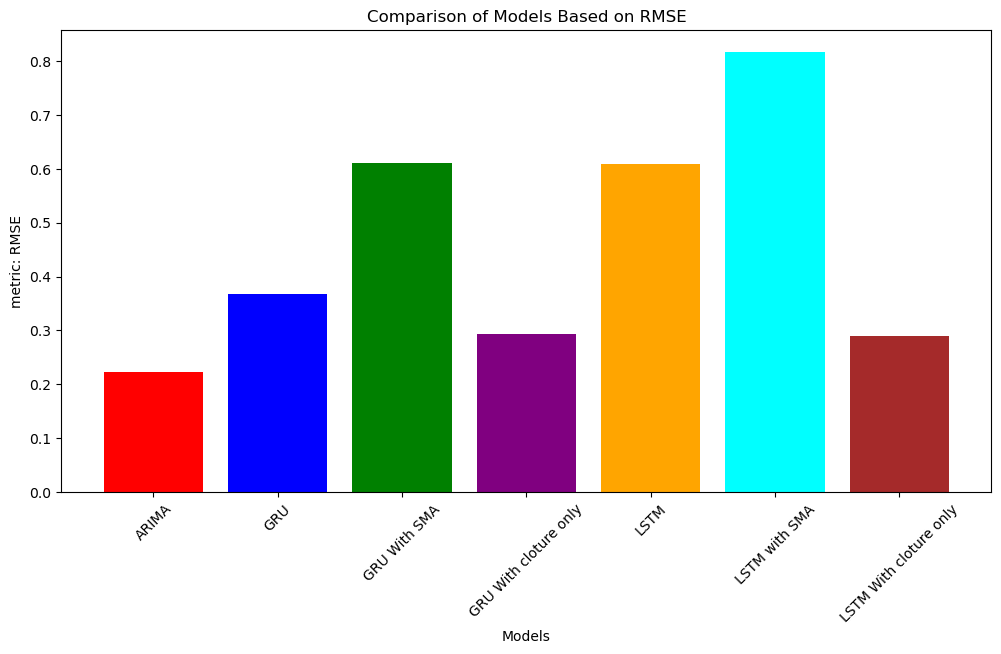

evaluating ARIMA model ...
number of days to predict: 1119
prediction result shape: (1119,)
test y dim before flattening:(1119,)
predict y dim before flattening:(1119,)
test y dim after flattening:(1119,)
predict y dim after flattening:(1119,)
evaluating GRU model ...
input shape: (1059, 60, 5)
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step
prediction result shape: (1059, 1)
test y dim before flattening:(1059,)
predict y dim before flattening:(1059,)
test y dim after flattening:(1059,)
predict y dim after flattening:(1059,)
evaluating GRU With SMA model ...
input shape: (1049, 60, 8)
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step
prediction result shape: (1049, 1)
test y dim before flattening:(1049,)
predict y dim before flattening:(1049,)
test y dim after flattening:(1049,)
predict y dim after flattening:(1049,)
evaluating GRU With cloture only model ...
input shape: (1059, 60, 1)
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step
prediction result shape: (1059, 1)
test y dim before flattening:(1059, 1)
pred

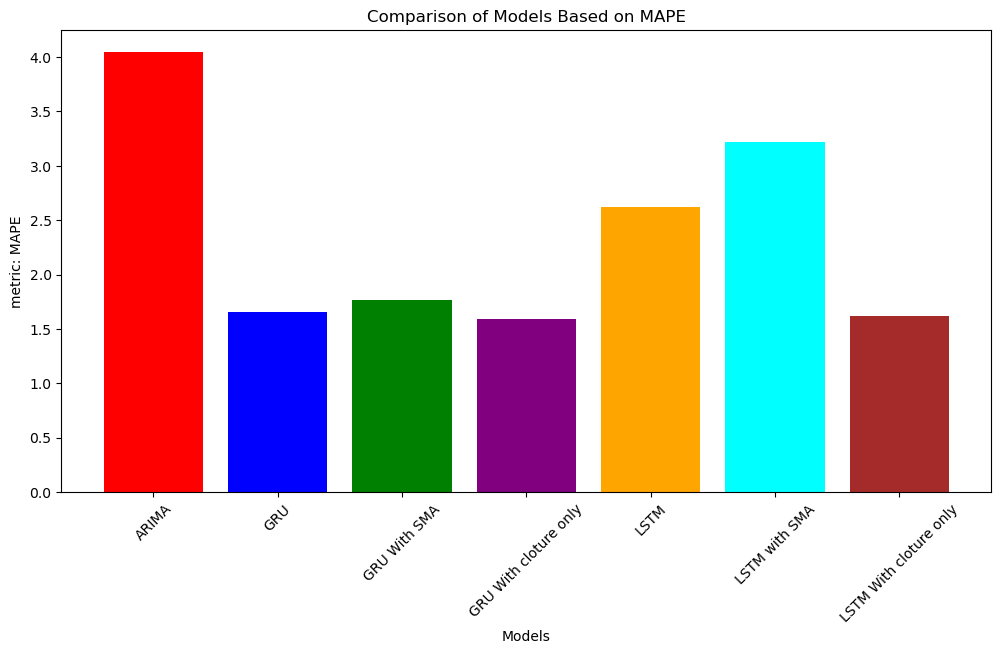

In [59]:
# rerun the evaluations
eval_result_rmse = evaluate(models_and_datasets, ValidationMetricEnum.RMSE, scalar_dict)
plot_evaluation_result(eval_result_rmse, "RMSE")

eval_result_mape = evaluate(models_and_datasets, ValidationMetricEnum.MAPE, scalar_dict)
plot_evaluation_result(eval_result_mape, "MAPE")

In [62]:
# eye test:
dates_for_df = test_dataset["date"][60:]
dates_for_sma = test_SMA["date"][60:]
dates_for_cloture = dates_for_df.copy()
dates_for_arima = test_dataset["date"]

models_and_dates = {"ARIMA": dates_for_arima, 
                       "GRU": dates_for_df,
                       "GRU With SMA": dates_for_sma,
                       "GRU With cloture only": dates_for_cloture,
                       "LSTM": dates_for_df,
                       "LSTM with SMA": dates_for_sma,
                       "LSTM With cloture only": dates_for_cloture}

plotting ARIMA model ...
number of days to predict: 1119
prediction result shape: (1119,)


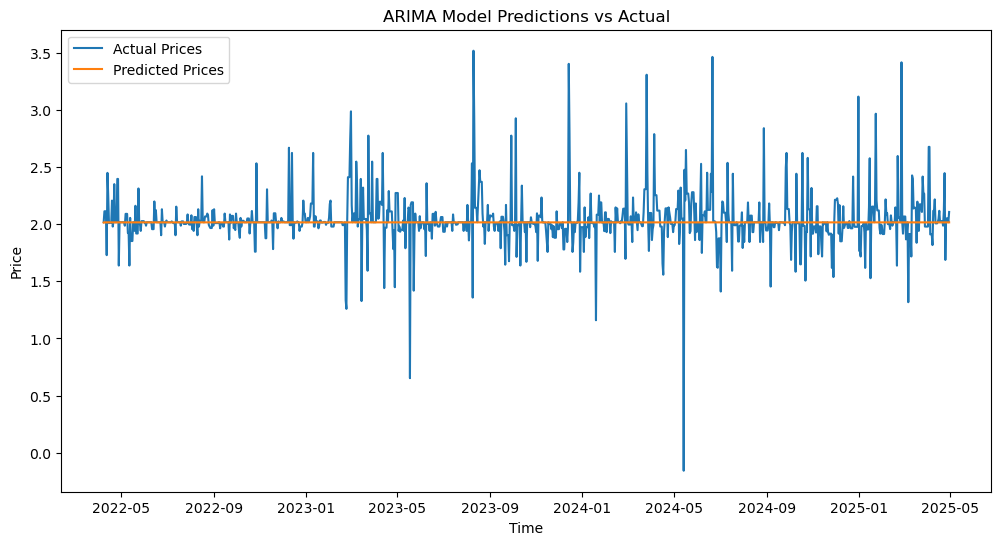

plotting GRU model ...
input shape: (1059, 60, 5)
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step
prediction result shape: (1059, 1)


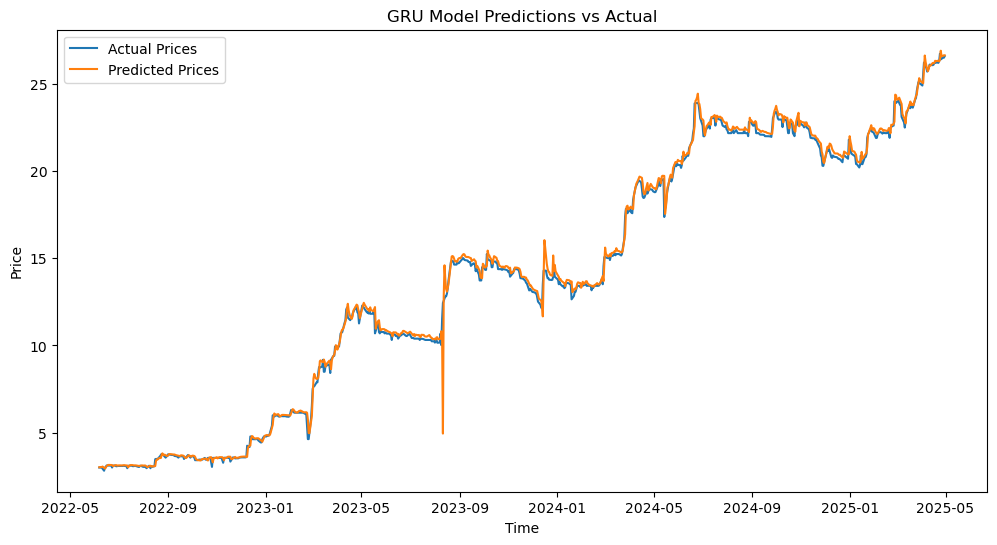

plotting GRU With SMA model ...
input shape: (1049, 60, 8)
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step
prediction result shape: (1049, 1)


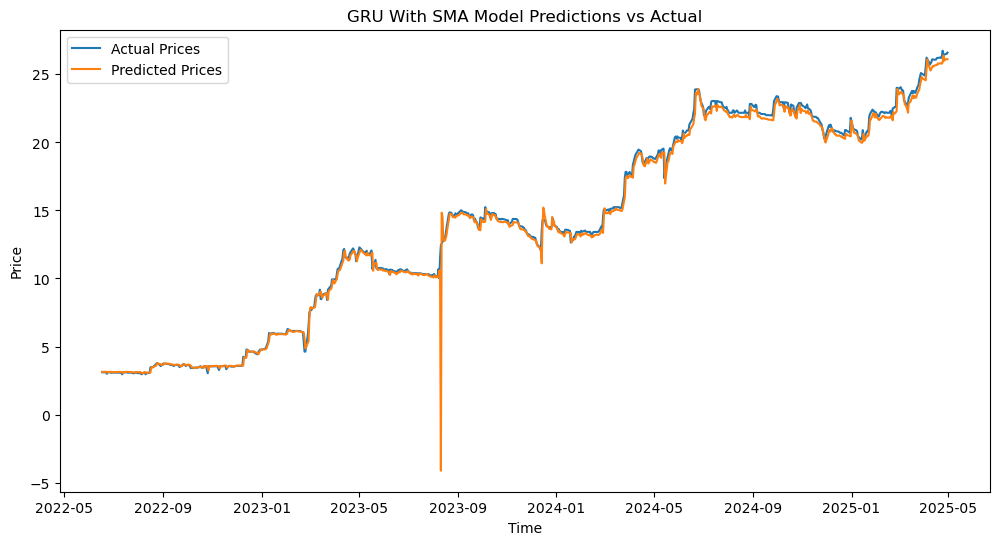

plotting GRU With cloture only model ...
input shape: (1059, 60, 1)
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step
prediction result shape: (1059, 1)


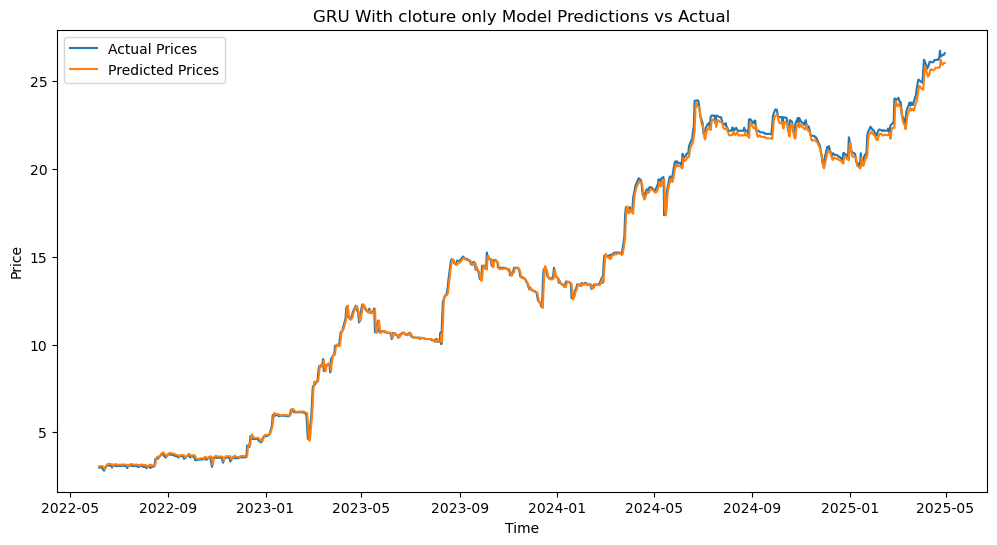

plotting LSTM model ...
input shape: (1059, 60, 5)
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step
prediction result shape: (1059, 1)


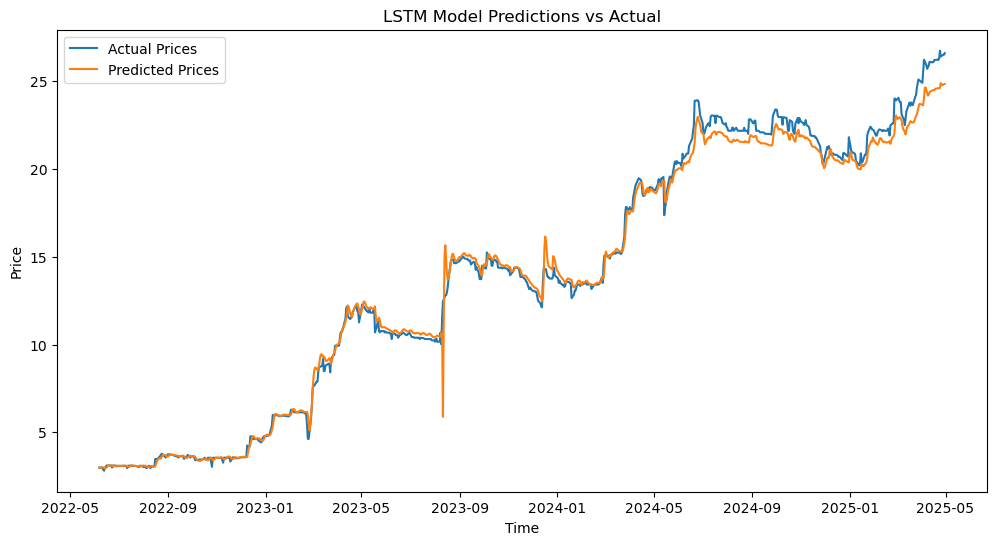

plotting LSTM with SMA model ...
input shape: (1049, 60, 8)
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 246ms/step
prediction result shape: (1049, 1)


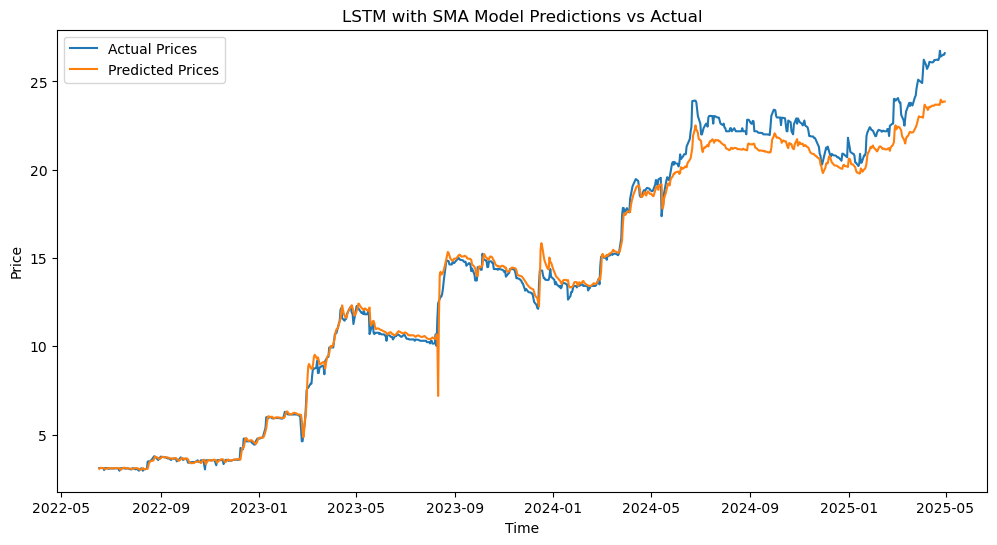

plotting LSTM With cloture only model ...
input shape: (1059, 60, 1)
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 281ms/step
prediction result shape: (1059, 1)


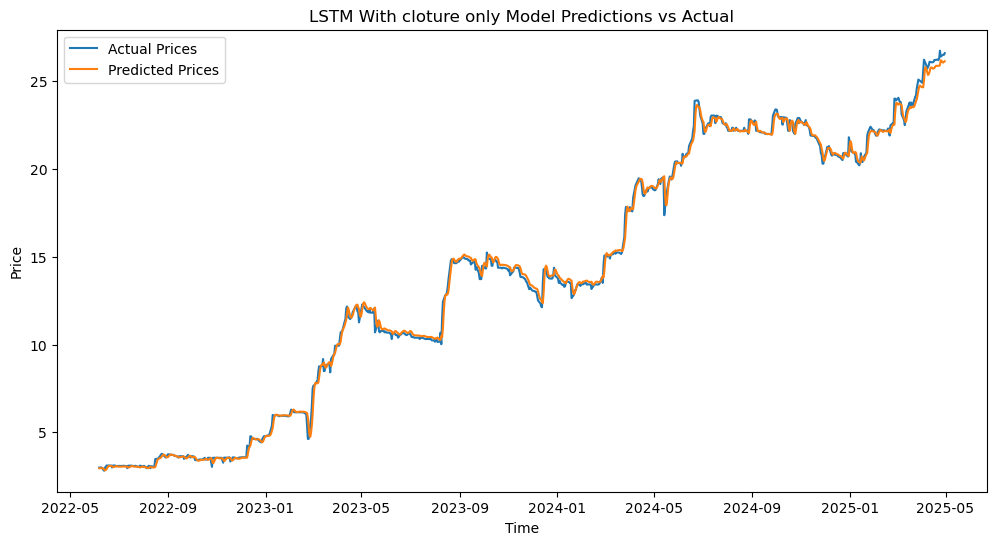

In [64]:
for key in models_and_dates.keys():
    print(f"plotting {key} model ...")
    dates = models_and_dates[key]
    model = models_and_datasets[key][0]
    test_df = models_and_datasets[key][2]
    scaler = scalar_dict[key]
    ShouldOnlyKeepCloseCol = test_df.shape[1] > 1
    isArimaContext = isinstance(model, ARIMAModel)
    if ShouldOnlyKeepCloseCol :
        test_df_copy = test_df.copy()
        cols_to_drop = test_df_copy.columns[test_df_copy.columns.str.match('date')]
        test_df_copy.drop(cols_to_drop, axis=1, inplace=True)
        test_dataset_transformed = scaler.transform(test_df_copy)
        closeColIdx = test_df_copy.columns.get_loc('cloture')
    else :
        test_dataset_transformed = scaler.transform(test_df)
        closeColIdx = 0   
    scale = 1/scaler.scale_[closeColIdx]         
    x_test, y_test = get_features_target_from_dataset(test_dataset_transformed, ShouldOnlyKeepCloseCol, closeColIdx=closeColIdx, isArimaContext=isArimaContext)
    y_pred = model.predict(x_test).flatten()
    y_test = y_test.flatten()
    y_pred = y_pred * scale
    y_test = y_test * scale
    plot_stock_graph(dates, y_test, y_pred, key)
    

